Imagina que estas trabajando como analista de datos en el Departamento de Salud. El gobierno está
considerando comprar un nuevo medicamento contra un virus mortal y contagioso. Sin embargo, existen
algunas dudas sobre la efectividad del nuevo medicamento contra el virus (15 pts total).

Nombre: Joaquin Gutierrez

Respuestas a) y b)

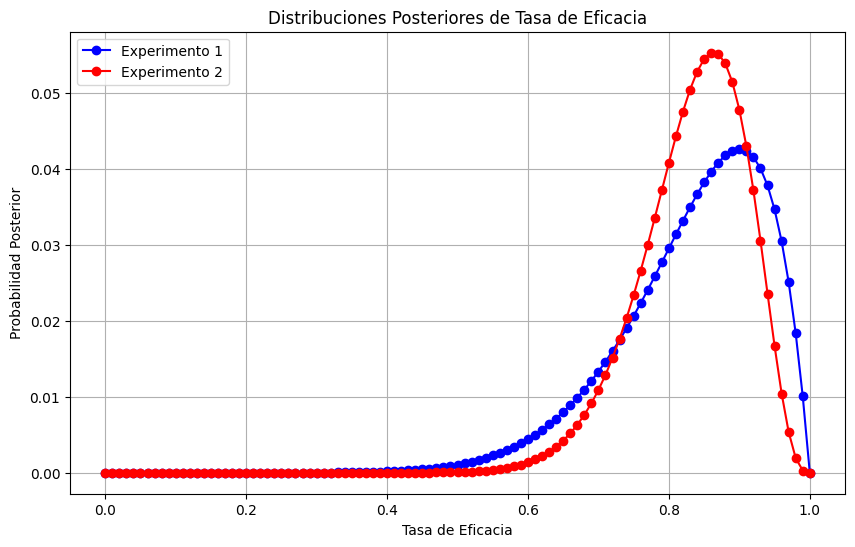

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az
from scipy import stats as scipy_stats

# Datos del primer experimento
total_pacientes1 = 10
pacientes_curados1 = 9

# Datos del segundo experimento
total_pacientes2 = 12
pacientes_curados2 = 10

# Definir un rango de posibles valores para la tasa de eficacia (probabilidad de éxito)
p_eficacia = np.linspace(0, 1, 101)

# Calcular la probabilidad posterior para el primer experimento
probabilidad1 = stats.binom.pmf(pacientes_curados1, total_pacientes1, p_eficacia)
previa1 = np.ones_like(p_eficacia)
posterior1 = probabilidad1 * previa1
posterior1 /= posterior1.sum()

# Calcular la probabilidad posterior para el segundo experimento
probabilidad2 = stats.binom.pmf(pacientes_curados2, total_pacientes2, p_eficacia)
previa2 = posterior1  # Usar la posterior del primer experimento como prior para el segundo
posterior2 = probabilidad2 * previa2
posterior2 /= posterior2.sum()  # Normalizar la probabilidad posterior

# Graficar ambas distribuciones posteriores en un mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(p_eficacia, posterior1, marker='o', linestyle='-', color='blue', label='Experimento 1')
plt.plot(p_eficacia, posterior2, marker='o', linestyle='-', color='red', label='Experimento 2')
plt.title('Distribuciones Posteriores de Tasa de Eficacia')
plt.xlabel('Tasa de Eficacia')
plt.ylabel('Probabilidad Posterior')
plt.legend()
plt.grid(True)
plt.show()


Respuestas c)

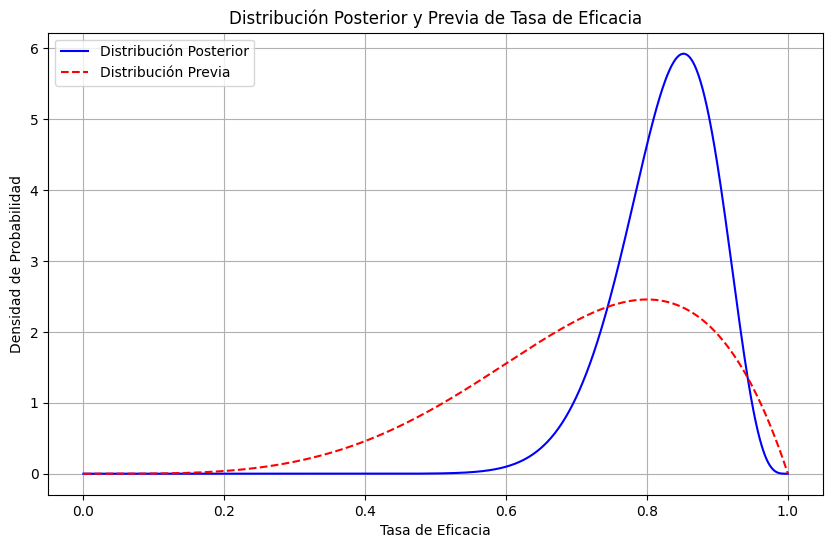

In [2]:
# Parámetros de la distribución previa Beta
a_prev = 5
b_prev = 2

# Simular la distribución posterior utilizando la distribución Beta conjugada
a_posterior = a_prev + pacientes_curados1 + pacientes_curados2
b_posterior = b_prev + total_pacientes1 + total_pacientes2 - pacientes_curados1 - pacientes_curados2

# Generar valores de la tasa de eficacia en un rango
p_eficacia = np.linspace(0, 1, 1001) 

# Calcular la distribución posterior utilizando la distribución Beta
posterior = stats.beta.pdf(p_eficacia, a_posterior, b_posterior)

# Calcular la distribución previa
prior = stats.beta.pdf(p_eficacia, a_prev, b_prev)

# Graficar la distribución posterior junto a la distribución previa
plt.figure(figsize=(10, 6))
plt.plot(p_eficacia, posterior, label='Distribución Posterior', color='blue')
plt.plot(p_eficacia, prior, label='Distribución Previa', color='red', linestyle='--')
plt.title('Distribución Posterior y Previa de Tasa de Eficacia')
plt.xlabel('Tasa de Eficacia')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

Respuesta d)

In [3]:
# Calcular la media de la distribución posterior
media_posterior = a_posterior / (a_posterior + b_posterior)

# Número de personas infectadas
personas_infectadas = 100000

# Estimar cuántas personas podrían ser curadas
personas_curadas = media_posterior * personas_infectadas

print(f"Estimación de personas curadas: {int(personas_curadas)}")

Estimación de personas curadas: 82758


Respuesta e)

In [4]:
mediana_posterior = stats.beta.ppf(0.5, a_posterior, b_posterior)
min_personas_curadas = int(mediana_posterior * personas_infectadas)
print(f"Número mínimo de personas curadas con 50% de probabilidad: {min_personas_curadas}")

Número mínimo de personas curadas con 50% de probabilidad: 83516


Respuesta f)


In [5]:
posterior_samples = np.random.beta(a_posterior, b_posterior, size=10000)
hpd_90 = az.hdi(posterior_samples, credible_interval=0.90)
min_personas_curadas_90 = int(hpd_90[0] * personas_infectadas)
print(f"Número mínimo de personas curadas con 90% de probabilidad: {min_personas_curadas_90}")

Número mínimo de personas curadas con 90% de probabilidad: 70470


Respuesta g)

In [7]:
hpd_95 = az.hdi(posterior_samples, credible_interval=0.95)
print(f"Intervalo HPDbhn del 95% para la tasa de eficacia: ({hpd_95[0]:.4f}, {hpd_95[1]:.4f})")

Intervalo HPDbhn del 95% para la tasa de eficacia: (0.7047, 0.9517)
